<a href="https://colab.research.google.com/github/PVGs-AI-Club/TE-Resources/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker','Bag', 'Ankle Boot']

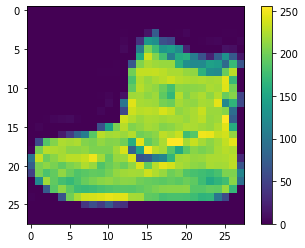

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

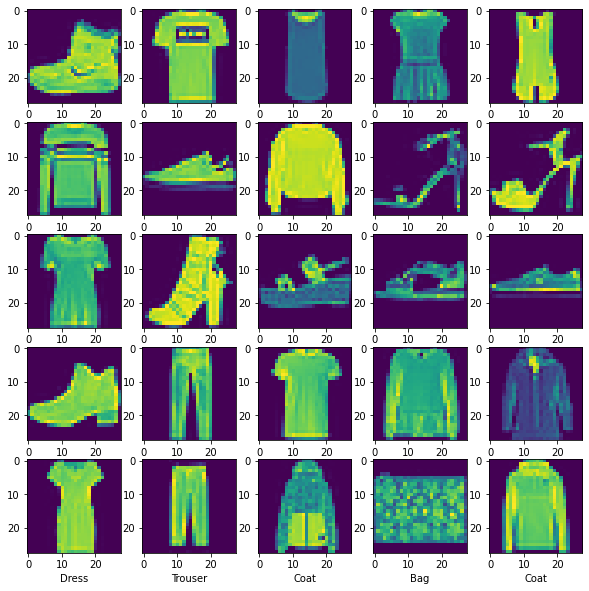

In [ ]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[Y_train[i]])
plt.show()

In [ ]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))
Y_train = Y_train.reshape((60000,1))
Y_test = Y_test.reshape((10000,1))

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        # keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', strides=(1,1), activation='relu'),
        # keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 41s 6ms/step - loss: 0.4175 - accuracy: 0.8496
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2856 - accuracy: 0.8971
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2446 - accuracy: 0.9096
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2149 - accuracy: 0.9208
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1936 - accuracy: 0.9279
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1748 - accuracy: 0.9348
Epoch 7/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1571 - accuracy: 0.9416
Epoch 8/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1450 - accuracy: 0.9452
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1307 - accuracy: 0.9505
Epoch 10/15
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2951 - accuracy: 0.9185


[0.2950563132762909, 0.9185000061988831]